In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
telco_data= pd.read_csv("churn_data.csv")
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco_data.shape

(7043, 21)

In [4]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'],errors='coerce')

In [5]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [6]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
telco_data.columns=telco_data.columns.str.lower()

In [9]:
telco_data['totalcharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: totalcharges, dtype: float64

In [10]:
telco_data.dropna(axis=0,inplace=True)
telco_data.shape

(7032, 21)

In [11]:
telco_data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [12]:
telco_data.nunique()

customerid          7032
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                72
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1584
totalcharges        6530
churn                  2
dtype: int64

In [13]:
telco_data["churn"].value_counts(normalize=True)*100

No     73.421502
Yes    26.578498
Name: churn, dtype: float64

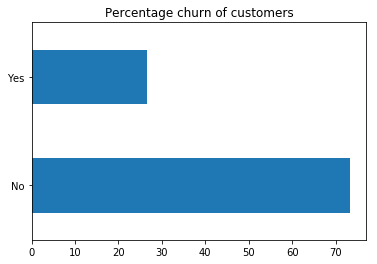

In [14]:
perct_churn= (telco_data["churn"].value_counts(normalize=True)*100).plot.barh().set_title("Percentage churn of customers")


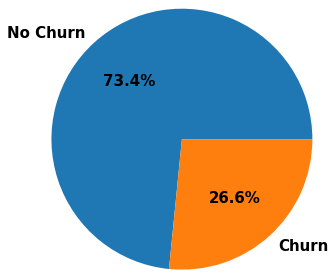

In [39]:
plt.pie(telco_data['churn'].value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1.5, textprops={'fontsize': 15, 'fontweight': 'bold'});

In [15]:
telco_data["gender"].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

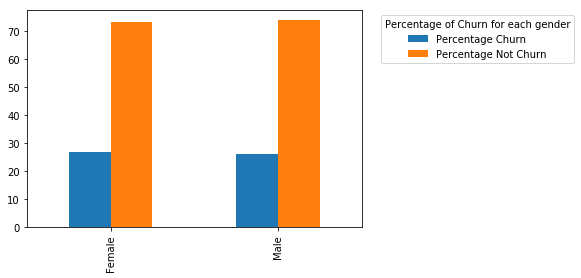

In [42]:
male_gender_churn_distribution = round((telco_data[telco_data['gender']=='Male']['churn']).value_counts()[1]/ len(telco_data[telco_data['gender']=='Male']['churn'])*100,2)
female_gender_churn_distribution= round((telco_data[telco_data['gender']=='Female']['churn']).value_counts()[1]/ len(telco_data[telco_data['gender']=='Female']['churn'])*100,2)


perc_customer_churn= pd.DataFrame({"Percentage Churn":{"Male":male_gender_churn_distribution,"Female":female_gender_churn_distribution},
                                   "Percentage Not Churn":{"Male":100-male_gender_churn_distribution,"Female":100-female_gender_churn_distribution}})
perc_customer_churn.plot.bar().legend(bbox_to_anchor=(1.65, 1.0)).set_title("Percentage of Churn for each gender")




In [28]:
male_gender_churn_distribution = round((telco_data[telco_data['gender']=='Male']['churn']).value_counts()[1]/ len(telco_data[telco_data['gender']=='Male']['churn'])*100,2)
male_gender_churn_distribution

26.2

In [26]:
female_gender_churn_distribution= round((telco_data[telco_data['gender']=='Female']['churn']).value_counts()[1]/ len(telco_data[telco_data['gender']=='Female']['churn'])*100,2)
female_gender_churn_distribution

26.96

In [22]:
telco_data[telco_data['gender']=='Female']['churn'].value_counts()

No     2544
Yes     939
Name: churn, dtype: int64

In [27]:
telco_data[telco_data['gender']=='Male']["churn"].value_counts()

No     2619
Yes     930
Name: churn, dtype: int64

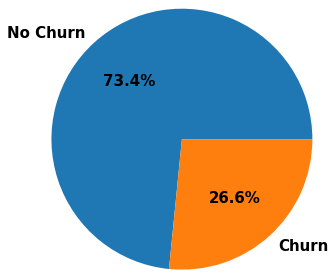

In [36]:
plt.pie(telco_data['churn'].value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1.5, textprops={'fontsize': 15, 'fontweight': 'bold'});

In [44]:
telco_data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
telco_data[telco_data['seniorcitizen']==0]['churn'].value_counts(normalize=True)

No     0.763497
Yes    0.236503
Name: churn, dtype: float64

In [46]:
telco_data['seniorcitizen'].value_counts()

0    5890
1    1142
Name: seniorcitizen, dtype: int64

In [51]:
telco_data[telco_data['seniorcitizen']==1]['churn'].value_counts(normalize=True)

No     0.583187
Yes    0.416813
Name: churn, dtype: float64

In [52]:
telco_data[telco_data['seniorcitizen']==1]['churn'].value_counts()

No     666
Yes    476
Name: churn, dtype: int64

In [53]:
telco_data[telco_data['seniorcitizen']==0]['churn'].value_counts()

No     4497
Yes    1393
Name: churn, dtype: int64

In [54]:
telco_data[telco_data['seniorcitizen']==0]['churn'].value_counts(normalize=True)

No     0.763497
Yes    0.236503
Name: churn, dtype: float64

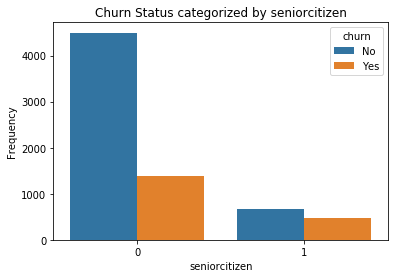

In [58]:
senior_citizens= sns.countplot(x = 'seniorcitizen', hue = 'churn', data = telco_data)
senior_citizens.set_title('Churn Status categorized by seniorcitizen')
plt.xlabel('seniorcitizen')
plt.ylabel('Frequency')
plt.show()

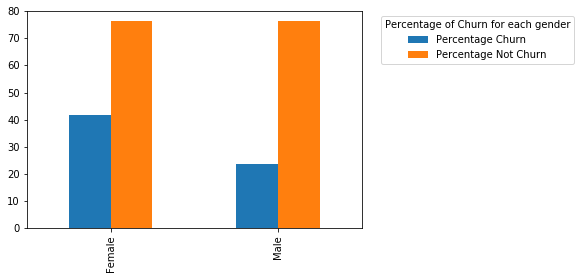

In [60]:
nonseniorcitizens_churn_distribution = round((telco_data[telco_data['seniorcitizen']==0]['churn']).value_counts()[1]/ len(telco_data[telco_data['seniorcitizen']==0]['churn'])*100,2)
seniorcitizens_churn_distribution= round((telco_data[telco_data['seniorcitizen']==1]['churn']).value_counts()[1]/ len(telco_data[telco_data['seniorcitizen']==1]['churn'])*100,2)

perc_seniorcit_churn= pd.DataFrame({"Percentage Churn":{"":nonseniorcitizens_churn_distribution,"Female":seniorcitizens_churn_distribution},
                                   "Percentage Not Churn":{"Male":100-nonseniorcitizens_churn_distribution,"Female":100-nonseniorcitizens_churn_distribution}})
perc_seniorcit_churn.plot.bar().legend(bbox_to_anchor=(1.65, 1.0)).set_title("Percentage of Churn for each gender")


